In [84]:
# import stuff

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# change this with the folder where you have saved the file
os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\micrometereology\\02')

In [160]:
# FUNCTIONS

def plot_format_logzvsU():
    #plt.axhline(0,color='k') 
    #plt.axvline(0,color='k') 
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m/s]')
    plt.legend(loc='lower right')
    plt.title('Average of Easterly Wind Profiles over Height')

    plt.xlim(0,10)
    plt.ylim(-3,5)
    plt.show()

def plot_format_logzvsU_zoom():
    plt.rc('font', size=13)
    plt.rc('axes', titlesize=13)
    plt.rc('axes', labelsize=13)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m/s]')
    plt.legend(loc='upper left')
    plt.title('Average of Easterly Wind Profiles over Height')

    plt.xlim(5,8)
    plt.ylim(4,5)

    plt.show()

def plot_format_logzvslogU():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('log Wind speed U [m/s]')
    plt.ylabel('log z [m/s]')
    plt.legend(loc='lower right')
    plt.title('Average of Easterly Wind Profiles over Height')

    plt.show()

def get_U(data, Lreciprocal, V10, V40, V60, V80, V100):
    for i in range(1,len(data)):
        if 60 < direction[i] < 120:
            if abs(Lreciprocal[i]) < 0.0008:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std


def plot_histogram(array_data, num, color, label):
    # plots the histogram of an array of data
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = np.histogram(array_data, bins=num, density=True)
    delta = num/100000
    width_bar = (max(array_data) - min(array_data)) / num + delta
    plt.bar(x, y[0], width=width_bar, align='center', color=color, label=label)
    area = np.sum(y[0]*(width_bar-delta))
    print(f"area under graph = {area:.5f}")

def plot_Gaussian(array_data, mu, sig, color, label):
    # computes the gaussian distribution given mu and sig and plots it in the range of the data to avoid zeros
    x = np.linspace(min(array_data), max(array_data), num=100)
    y = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2*((x-mu)/sig)**2)
    plt.plot(x, y, color=color, label=label)

def linear_regression(x,y):
    x_ave = np.sum(x)/len(x)
    y_ave = np.sum(y)/len(y)
    squaresumx = np.sum((x-x_ave)**2)
    squaresumy = np.sum((y-y_ave)**2)
    crossterm = np.sum((x-x_ave)*(y-y_ave))
    slope = crossterm/squaresumx
    intercept = y_ave - slope*x_ave
    
    return slope, intercept


def plot_linear_regression(x,y,color, label):
        
    slope, intercept = linear_regression(x,y)
    
    x_interpol = np.insert(x, 0, 0)
    x_interpol = np.append(x_interpol, x_interpol[-1]+0.5)
    y_interpol = x_interpol * slope + intercept
    
    plt.plot(x_interpol, y_interpol, color=color, label='label')
        

In [130]:
# DATA

data = pd.read_csv('Hoevsoere2008.csv', delimiter=',', header=0, 
                    names=['time','ustar','Q0','direction','theta0', 'V10', 'V40','V60','V80','V100'])

ustar = data['ustar'].values
Q0 = data['Q0'].values
direction = data['direction'].values
theta0 = data['theta0'].values
V10 = data['V10'].values
V40 = data['V40'].values
V60 = data['V60'].values
V80 = data['V80'].values
V100 = data['V100'].values

k = 0.4
g = 9.8
Lreciprocal =  -k*g*Q0/(theta0*ustar**3)
z = [10,40,60,80,100]
V_all = []


all data: mean=-0.075, std=32.598
area under graph = 1.00000


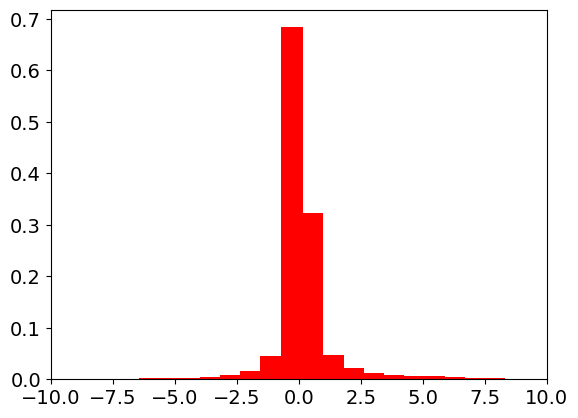

cleaned data: mean=0.051, std=8.781
area under graph = 1.00000


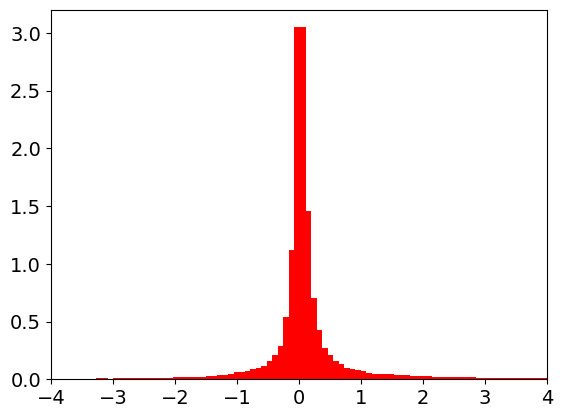

In [89]:
# QUESTION 1

Lreciprocal_mean = np.mean(Lreciprocal)    #= mu
Lreciprocal_std = np.std(Lreciprocal)      #= sigma
print(f"all data: mean={Lreciprocal_mean:.3f}, std={Lreciprocal_std:.3f}")
plot_histogram(Lreciprocal, 10000,'r', 'all data')
plt.xlim(-10,10)
plt.show()


Lclean = Lreciprocal[(Lreciprocal > -500) & (Lreciprocal < 500)]
Lclean_mean = np.mean(Lclean)    #= mu
Lclean_std = np.std(Lclean)      #= sigma
print(f"cleaned data: mean={Lclean_mean:.3f}, std={Lclean_std:.3f}")
plot_histogram(Lclean, 10000,'r', 'cleaned')
plt.xlim(-4,4)
plt.show()

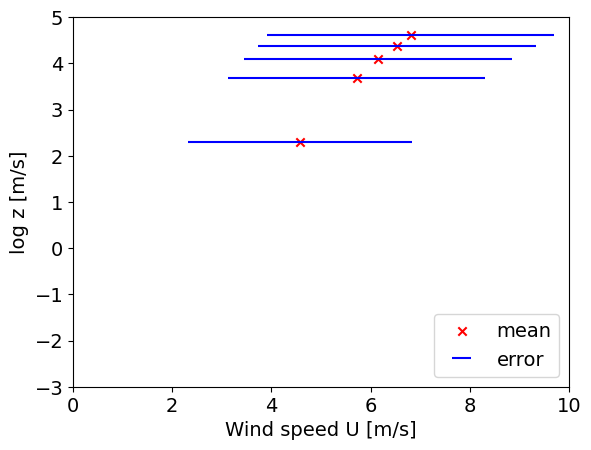

In [131]:
# QUESTION 2

#####     a     ################################################################

def question2a(z):
    U, U_std = get_U(data, Lreciprocal, V10, V40, V60, V80, V100)

    logz = np.log(z)
    x_error = U_std
    plt.errorbar(U, logz, xerr = x_error, fmt ='none', color='b', label='error')
    
    plt.scatter(U, logz, marker='x', color='r', label='mean')
    return U, logz


U, logz = question2a(z)
plot_format_logzvsU()


Equation of the line: y = 1.08244x -2.60170


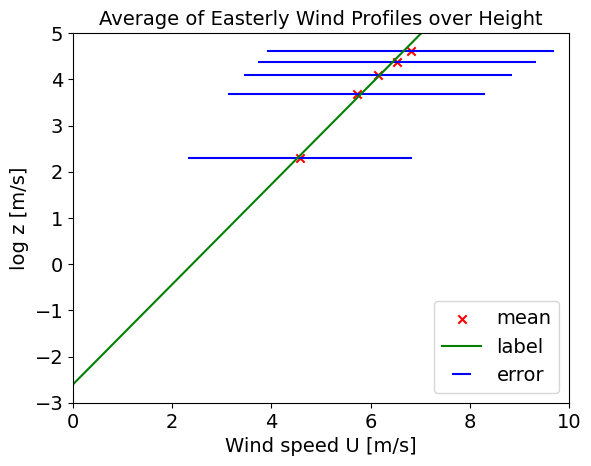

In [161]:
#####     b     ################################################################

def question2b():
    
    U, logz = question2a(z)

    x = U[:-1]
    y = logz[:-1]
    slope, intercept = linear_regression(x,y)
    print(f"Equation of the line: y = {slope:.5f}x {intercept:.5f}")
    plot_linear_regression(x, y, color='g', label='linear regression')
    
    
question2b()
plot_format_logzvsU()

In [133]:
#####     c     ################################################################

z0c = intercept
ustarc = k*slope
print(f"mean values of ustar = {ustarc:.5f} and zo = {z0c:.5f}")

mean values of ustar = 2.32297 and zo = -6.49595


Equation of the line: y = 1.08244x -2.60170


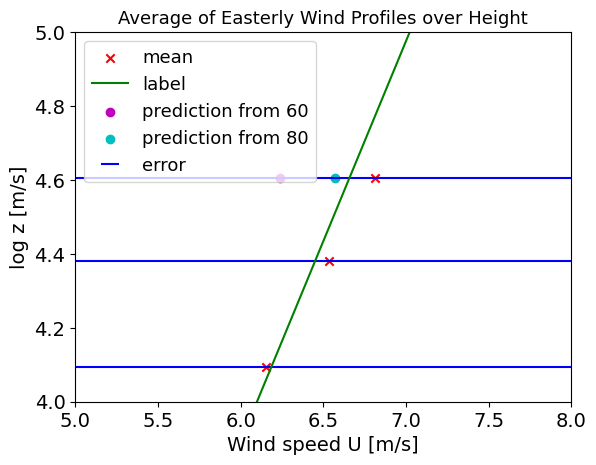

In [162]:
#####     d     ################################################################

def question2d():
    
    question2b()
    U60_mean = U[2]
    U80_mean = U[3]
    U100_mean = U[4]
    z60 = logz[2]
    z80 = logz[3]
    z100 = logz[4]

    U100_60 = (z100-z60)/slope + U60_mean
    U100_80 = (z100-z80)/slope + U80_mean

    plt.scatter(U100_60, z100, color='m', label='prediction from 60')
    plt.scatter(U100_80, z100, color='c', label='prediction from 80')


question2d()
plot_format_logzvsU_zoom()


Equation of the line: y = 5.91082 x -6.66533
estimated alpha = 0.17


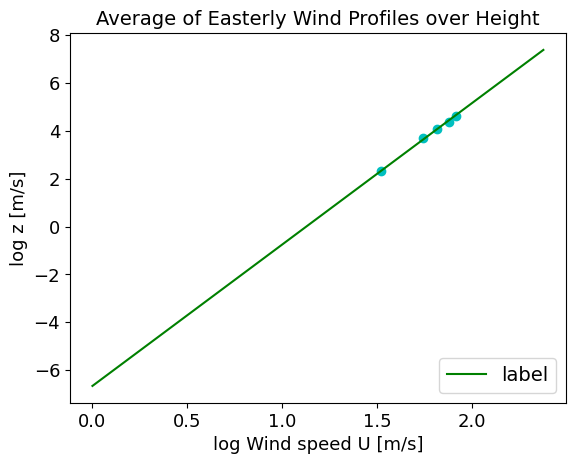

In [163]:
#####     e     ################################################################

def question2e():
    U, U_std = get_U(data, Lreciprocal, V10, V40, V60, V80, V100)

    logU_1080 = np.log(U[:-1])
    logz_1080 = np.log(z[:-1])

    logU = np.log(U)
    logz = np.log(z)

    plt.scatter(logU, logz, marker='o', color='c')
    slope, intercept = linear_regression(logU_1080, logz_1080)
    print(f"Equation of the line: y = {slope:.5f} x {intercept:.5f}")
    plot_linear_regression(logU_1080, logz_1080, color='g', label='linear regression')

    alpha = 1/slope
    print(f"estimated alpha = {alpha:.2f}")


question2e()
plot_format_logzvslogU()

In [156]:
#####     f     ################################################################

U, U_std = get_U(data, Lreciprocal, V10, V40, V60, V80, V100)

logU_1080 = np.log(U[:-1])
logz_1080 = np.log(z[:-1])

logU = np.log(U)
logz = np.log(z)

slope, intercept = linear_regression(logU_1080, logz_1080)
alpha_mean = 1/slope

alpha_array = [alpha_mean]

U60 = U[2]
U80 = U[3]
U100 = U[4]
z60 = z[2]
z80 = z[3]
z100 = z[4]

alpha_60 = np.log(U100/U60) / np.log(z100/z60)
alpha_80 = np.log(U100/U80) / np.log(z100/z80)
alpha_array.extend([alpha_60, alpha_80])

print(f"alpha mean    = {alpha_mean:.3f}  \nalpha from 60 = {alpha_60:.3f} \nalpha from 80 = {alpha_80:.3f}")



alpha mean    = 0.169  
alpha from 60 = 0.200 
alpha from 80 = 0.188


In [159]:
#####     g     ################################################################

U100_array = []
for alpha in alpha_array:
    value = U80*(z100/z80)**alpha
    U100_array.append([value])
print(U100_array)


[[6.784497701703406], [6.831073895798987], [6.812547200000003]]


In [ ]:
#####     h     ################################################################
